# DRILL: Mo' blobs, mo' problems?
You've seen how these three methods work on three blobs of reasonably separated data. Now go back and change the data. Create more or fewer blobs, and set the blobs closer together or farther apart. Set up at least three different blob configuations, then run the four methods ( 𝑘 -means, mean shift, spectral clustering and affinity propagation) on each one. Write up a report for your mentor where you discuss what you learned about the clustering methods based on their relative performance for your different blob setups.

In [0]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Mean Shift Clustering

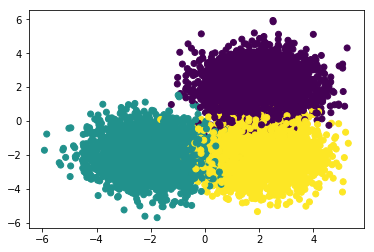

In [21]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

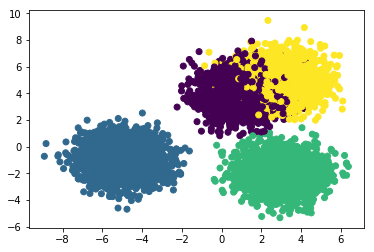

In [22]:
# The coordinates of the centers of our blobs.
centers = [[1, 4], [-5, -1], [3, -2], [3, 5]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

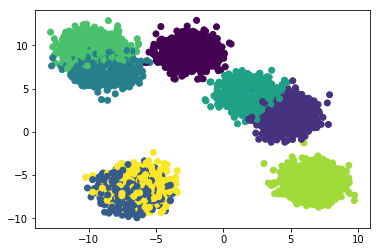

In [23]:

# The coordinates of the centers of our blobs.


# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=8,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

## K Means

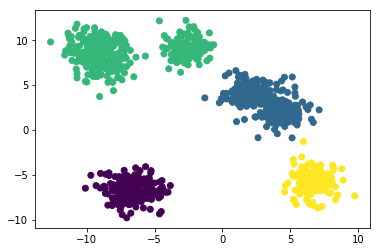

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0        0    0  124    0
1        0  120    0    0
2      110    0    0    0
3        0    0  127    0
4        0  143    0    0
5        0    0  124    0
6        0    0    0  128
7      124    0    0    0


In [24]:
from sklearn.cluster import KMeans

# Declare and fit the model.
km = KMeans(n_clusters=4, init='k-means++', max_iter=1000, n_init=5)
km.fit(X_train)

km_predict = km.fit_predict(X_train)

plt.scatter(X_train[:, 0], X_train[:, 1], c=km_predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train, km_predict))

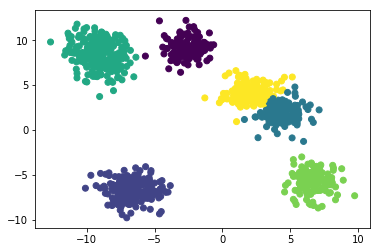

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4    5
row_0                              
0      124    0    0    0    0    0
1        0    0  113    0    0    7
2        0  110    0    0    0    0
3        1    0    0  126    0    0
4        0    0    5    0    0  138
5        0    0    0  124    0    0
6        0    0    1    0  127    0
7        0  124    0    0    0    0


In [25]:
# Declare and fit the model.
km = KMeans(n_clusters=6, init='k-means++', max_iter=1000, n_init=5)
km.fit(X_train)

km_predict = km.fit_predict(X_train)

plt.scatter(X_train[:, 0], X_train[:, 1], c=km_predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train, km_predict))

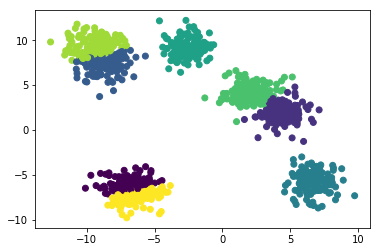

Comparing the assigned categories to the ones in the data:
col_0   0    1    2    3    4    5    6   7
row_0                                      
0       0    0    0    0  124    0    0   0
1       0  113    0    0    0    7    0   0
2      48    0    0    0    0    0    0  62
3       0    0  100    0    0    0   27   0
4       0    5    0    0    0  138    0   0
5       0    0   17    0    0    0  107   0
6       0    1    0  127    0    0    0   0
7      81    0    0    0    0    0    0  43


In [26]:
# Declare and fit the model.
km = KMeans(n_clusters=8, init='k-means++', max_iter=1000, n_init=5)
km.fit(X_train)

km_predict = km.fit_predict(X_train)

plt.scatter(X_train[:, 0], X_train[:, 1], c=km_predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train, km_predict))

## Spectral Clustering

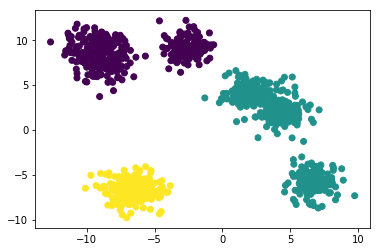

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      124    0    0
1        0  120    0
2        0    0  110
3      127    0    0
4        0  143    0
5      124    0    0
6        0  128    0
7        0    0  124


In [27]:
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

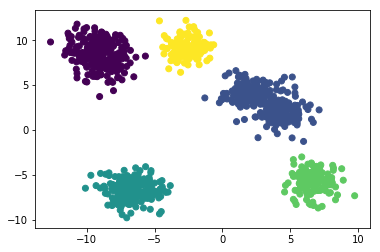

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4
row_0                         
0        0    0    0    0  124
1        0  120    0    0    0
2        0    0  110    0    0
3      127    0    0    0    0
4        0  143    0    0    0
5      124    0    0    0    0
6        0    1    0  127    0
7        0    0  124    0    0


In [28]:
# We know we're looking for five clusters.
n_clusters=5

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

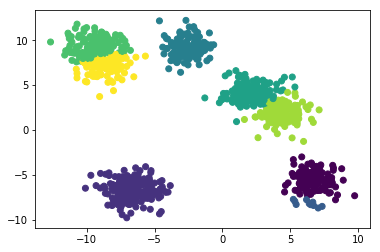

Comparing the assigned categories to the ones in the data:
col_0    0    1   2    3    4    5    6   7
row_0                                      
0        0    0   0  124    0    0    0   0
1        0    0   0    0   10    0  110   0
2        0  110   0    0    0    0    0   0
3        0    0   0    0    0   37    0  90
4        0    0   0    0  138    0    5   0
5        0    0   0    0    0  113    0  11
6      117    0  10    0    0    0    1   0
7        0  124   0    0    0    0    0   0


In [29]:
# We know we're looking for eight clusters.
n_clusters=8

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

## Affinity Propagation

In [30]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation(damping=0.5).fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 11


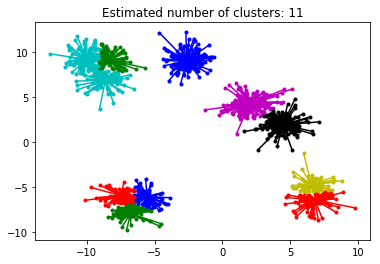

In [31]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

In [39]:
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation(damping=.60).fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 9


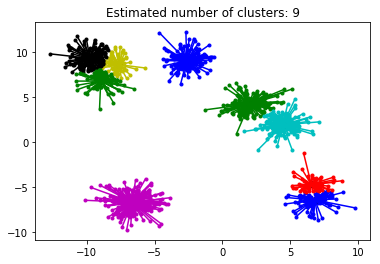

In [40]:
plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

In [33]:
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation(damping=.75).fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 8


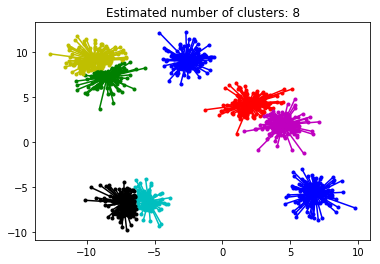

In [34]:
plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

The clustering algorithms were attempted using various blobs with different spacing and sizes. K-Means, MeanShift, and Spectral Clustering all had relatively predictable results with respect to cluster detection and sizes in all blob setups. Spectral clustering seems to have errant points belonging to one of the clusters surrounding the other clusters in the group.